In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:

df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [ ]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace =True)

In [ ]:
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace =True)

In [ ]:
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace =True)

In [ ]:
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace =True)

In [ ]:
df['sex'][df['sex'] == '.'] = np.nan

<ipython-input-37-fbb324dcfac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == '.'] = np.nan


In [ ]:
df['sex'] = df['sex'].fillna(method='ffill')

In [ ]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,FEMALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


<ipython-input-20-ae65ebdd98e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.flipper_length_mm	)


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

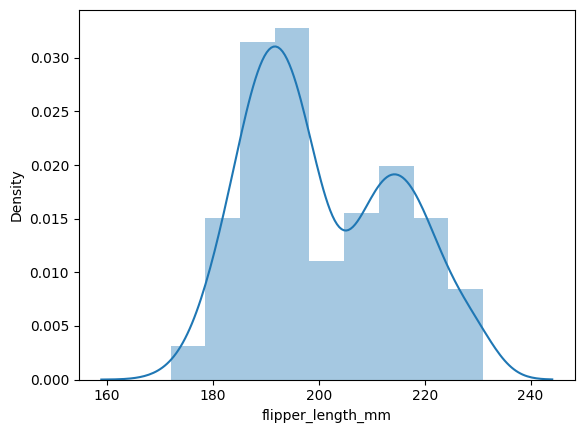

In [ ]:
sns.distplot(df.flipper_length_mm	)

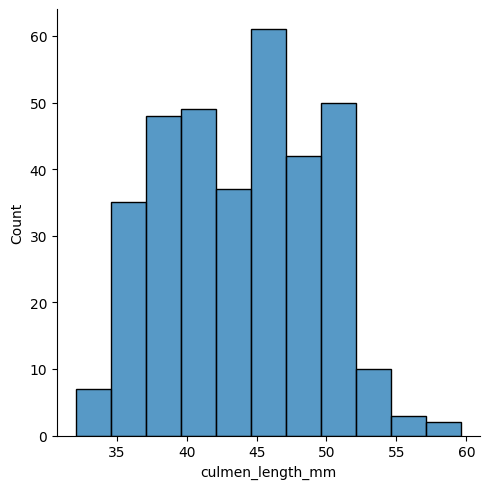

In [ ]:
sns.displot(df.culmen_length_mm)

<Axes: ylabel='sex'>

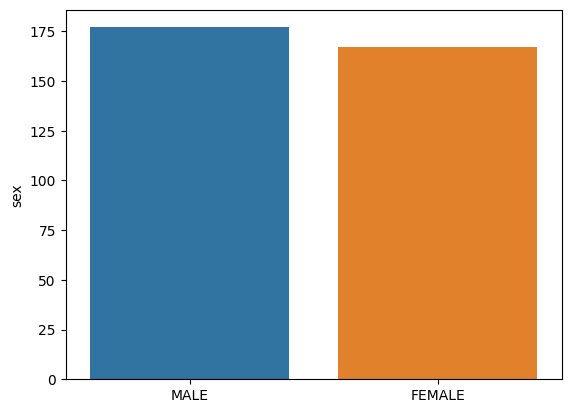

In [ ]:
sns.barplot(x =df.sex.value_counts().index,y =df.sex.value_counts() )

<Axes: ylabel='species'>

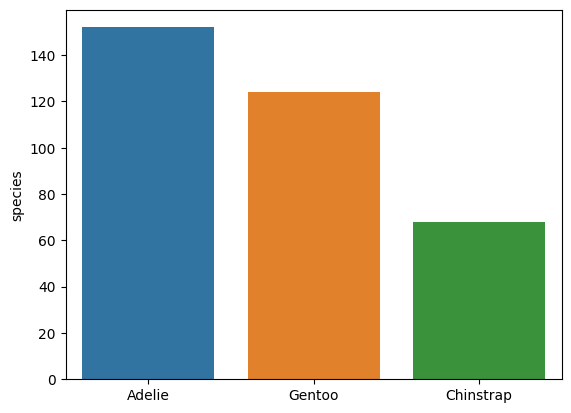

In [ ]:

sns.barplot(x =df.species.value_counts().index,y =df.species.value_counts() )

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

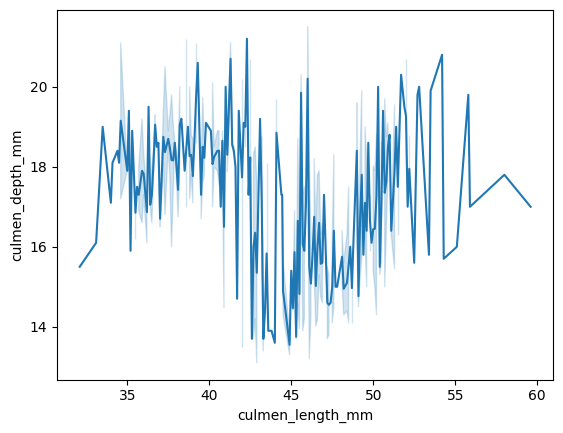

In [ ]:
sns.lineplot(x = df.culmen_length_mm,y=df.culmen_depth_mm	)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

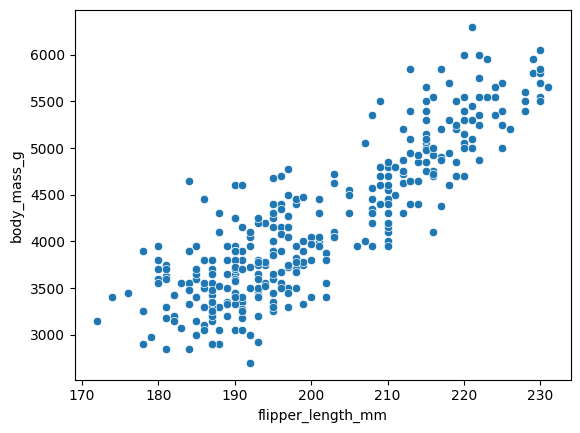

In [ ]:

sns.scatterplot(x = df.flipper_length_mm,y=df.body_mass_g	)

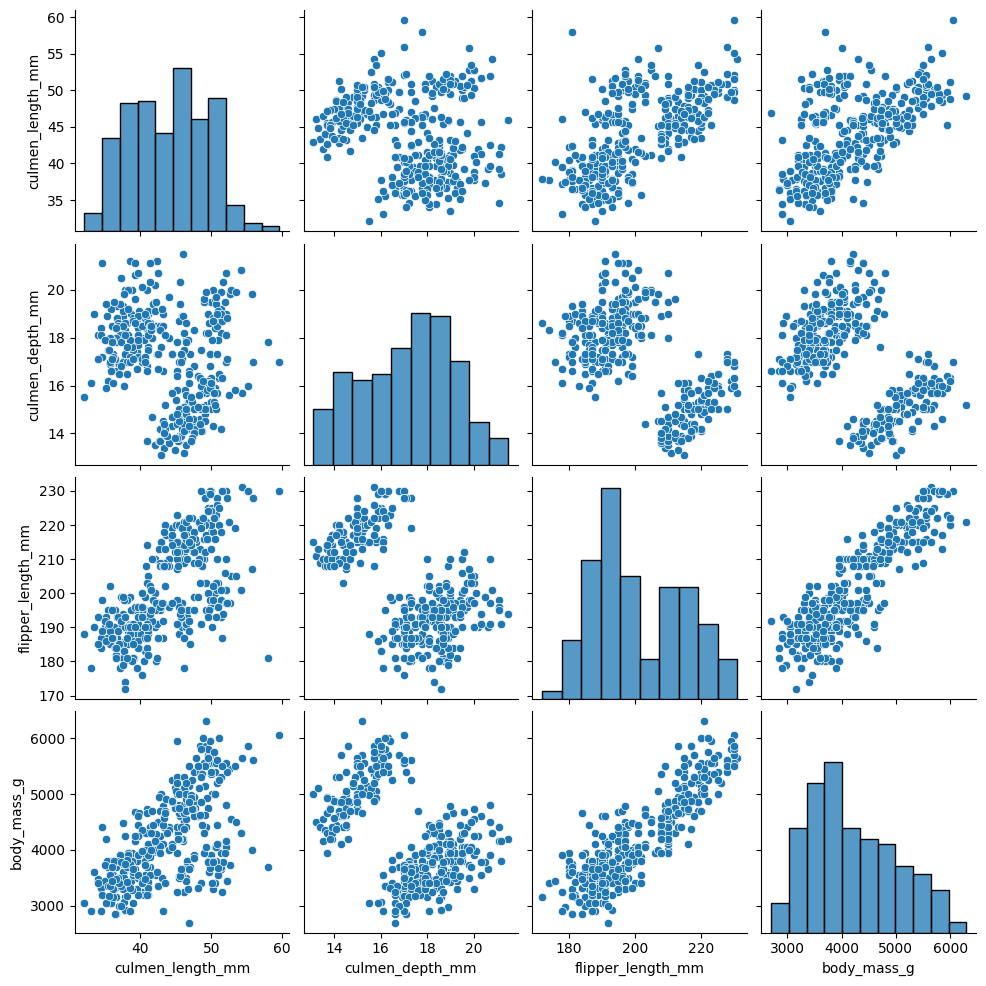

In [ ]:
sns.pairplot(df)

<Axes: >

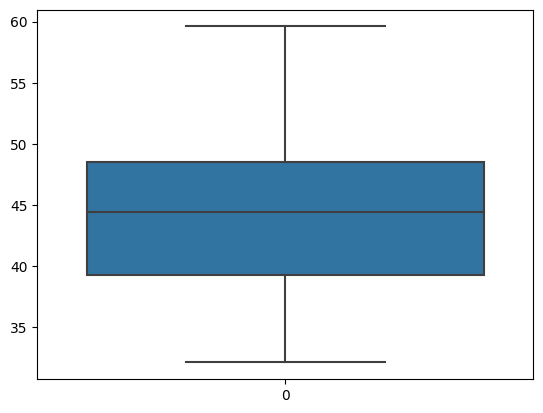

In [ ]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

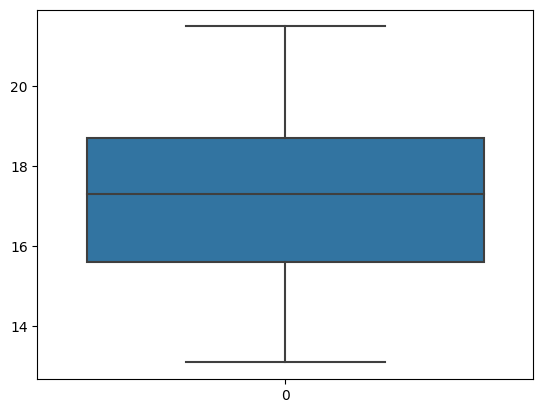

In [ ]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

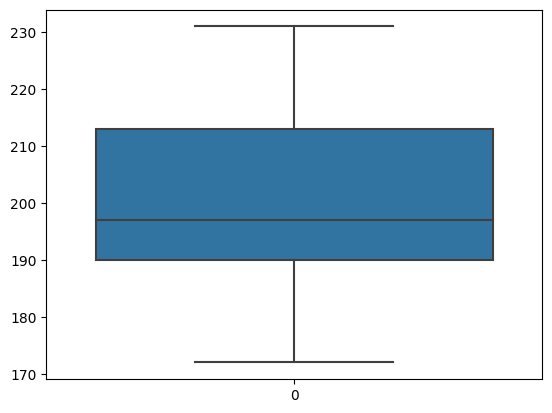

In [ ]:
sns.boxplot(df.flipper_length_mm)


<Axes: >

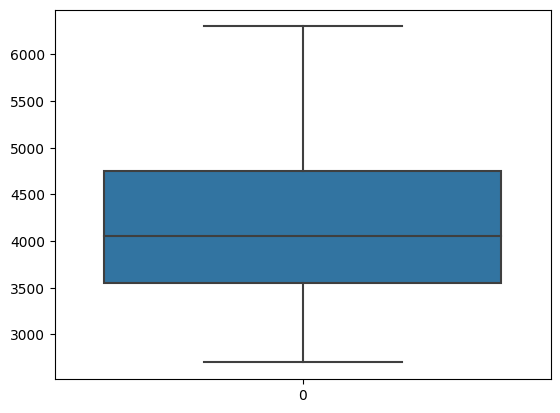

In [ ]:
sns.boxplot(df.body_mass_g)


In [ ]:

df.corr()


<ipython-input-34-b980d9905da1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


In [48]:
df.island.value_counts()

0    168
1    124
2     52
Name: island, dtype: int64

In [49]:
df.species.value_counts()

0    152
2    124
1     68
Name: species, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()



df.sex = le.fit_transform(df.sex)
df.species = le.fit_transform(df.species)


df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,0
4,0,2,36.70,19.3,193.0,3450.0,0


In [63]:
df_main = pd.get_dummies(df,columns =['island'])
df_main.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
0,0,39.10,18.7,181.0,3750.0,1,0,0,1
1,0,39.50,17.4,186.0,3800.0,0,0,0,1
2,0,40.30,18.0,195.0,3250.0,0,0,0,1
3,0,44.45,17.3,197.0,4050.0,0,0,0,1
4,0,36.70,19.3,193.0,3450.0,0,0,0,1


In [64]:

df_main.corr()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
species,1.000000,0.728706,-0.741282,0.850819,0.747547,0.009174,0.610710,-0.311589,-0.434574
culmen_length_mm,0.728706,1.000000,-0.235000,0.655858,0.594925,0.321617,0.238628,0.033525,-0.377934
culmen_depth_mm,-0.741282,-0.235000,1.000000,-0.583832,-0.471942,0.353771,-0.630421,0.455266,0.269497
flipper_length_mm,0.850819,0.655858,-0.583832,1.000000,0.871221,0.245076,0.609679,-0.419241,-0.288840
body_mass_g,0.747547,0.594925,-0.471942,0.871221,1.000000,0.409140,0.625432,-0.458774,-0.257834
sex,0.009174,0.321617,0.353771,0.245076,0.409140,1.000000,0.006494,-0.009719,0.003965
island_0,0.610710,0.238628,-0.630421,0.609679,0.625432,0.006494,1.000000,-0.733496,-0.412295
island_1,-0.311589,0.033525,0.455266,-0.419241,-0.458774,-0.009719,-0.733496,1.000000,-0.316818
island_2,-0.434574,-0.377934,0.269497,-0.288840,-0.257834,0.003965,-0.412295,-0.316818,1.000000


<Axes: >

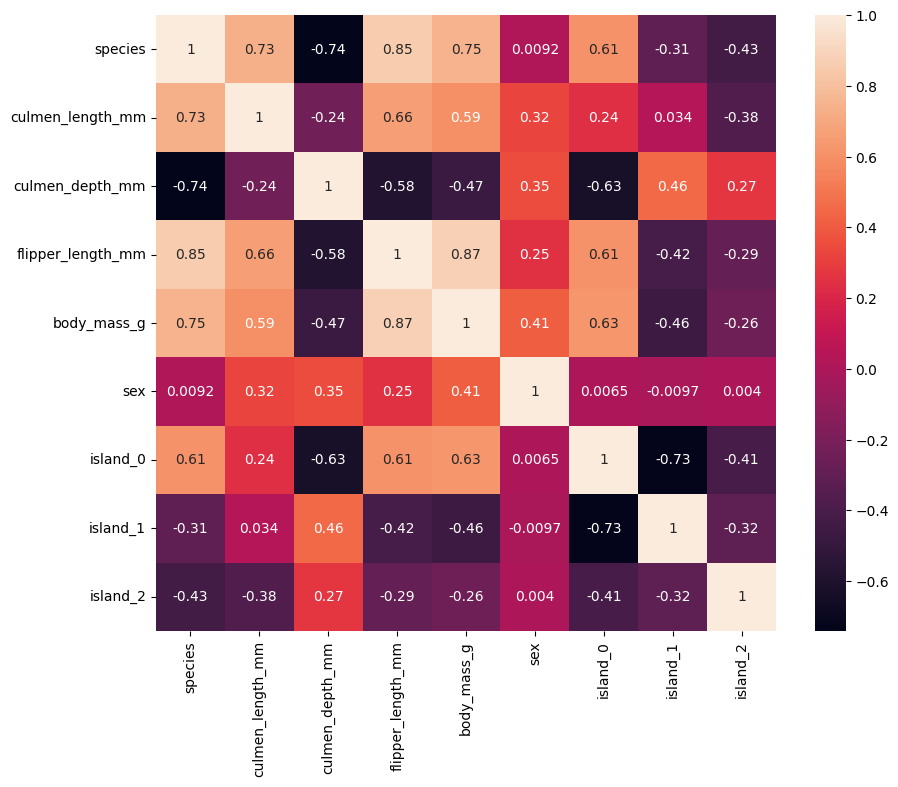

In [65]:

plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot =True)

In [67]:
y = df_main['species']
y


0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [69]:
X =df_main.drop(columns =['species'],axis =1)
X.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
0,39.10,18.7,181.0,3750.0,1,0,0,1
1,39.50,17.4,186.0,3800.0,0,0,0,1
2,40.30,18.0,195.0,3250.0,0,0,0,1
3,44.45,17.3,197.0,4050.0,0,0,0,1
4,36.70,19.3,193.0,3450.0,0,0,0,1


In [70]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [71]:

X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
0,0.254545,0.666667,0.152542,0.291667,1.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,0.0,1.0
3,0.449091,0.500000,0.423729,0.375000,0.0,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,0.0,0.0,0.0,1.0


In [72]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [73]:

X_train.shape


(240, 8)

In [74]:

X_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
258,0.432727,0.059524,0.610169,0.458333,0.0,1.0,0.0,0.0
332,0.414545,0.250000,0.694915,0.541667,0.0,1.0,0.0,0.0
121,0.203636,0.797619,0.440678,0.222222,1.0,0.0,0.0,1.0
61,0.334545,0.952381,0.389831,0.472222,1.0,1.0,0.0,0.0
70,0.050909,0.702381,0.305085,0.250000,0.0,0.0,0.0,1.0


In [75]:

y_train.shape

(240,)

In [76]:

X_test.shape

(104, 8)